In [1]:
from scipy.io import arff
import pandas as pd

# Cargar el archivo ARFF
data, meta = arff.loadarff('Sapfile1.arff')
df = pd.DataFrame(data)

# Mostrar las primeras filas del dataset para revisión inicial
df.head()


,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,b'F',b'G',b'Good',b'Good',b'Vg',b'Good',b'Y',b'Unmarried',b'V',b'Paid',...,b'Um',b'10',b'Farmer',b'Housewife',b'Large',b'Poor',b'Govt',b'Asm',b'Small',b'Good'
1,b'M',b'OBC',b'Vg',b'Vg',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'Um',b'Il',b'Service',b'Service',b'Small',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
2,b'F',b'OBC',b'Good',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'10',b'Service',b'Housewife',b'Average',b'Average',b'Govt',b'Asm',b'Large',b'Good'
3,b'M',b'MOBC',b'Pass',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',...,b'12',b'Um',b'Business',b'Business',b'Large',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
4,b'M',b'G',b'Good',b'Good',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',...,b'10',b'12',b'Service',b'Housewife',b'Large',b'Poor',b'Private',b'Asm',b'Small',b'Good'


### Preprocesado Inicial de los Datos

En este bloque de código se realiza el preprocesado inicial del conjunto de datos cargado desde el archivo `Sapfile1.arff`. Las acciones llevadas a cabo son las siguientes:

1. **Carga del archivo ARFF**: Se utiliza la librería `scipy.io.arff` para cargar los datos en un DataFrame de `pandas`.

2. **Conversión de valores byte a string**: Los valores del archivo ARFF están codificados como bytes (`b'...'`). Para facilitar su análisis, se convierten todos estos valores a cadenas de texto (`str`).

3. **Detección de valores nulos**: Se verifica si alguna columna contiene valores faltantes. En este caso, se confirma que no hay valores nulos en ninguna variable.

4. **Separación de variables por tipo**:
   - Se identifican las columnas categóricas (`object`).
   - Se identifican las columnas numéricas, si las hubiese.

5. **Análisis descriptivo**:
   - Para las variables categóricas, se muestran estadísticas como el número de valores únicos, el valor más frecuente (`top`) y su frecuencia (`freq`).
   - Para las variables numéricas, se mostrarían estadísticas como media, desviación estándar, mínimos, máximos y cuartiles. Sin embargo, en este conjunto de datos no hay variables numéricas.

Este análisis permite entender la estructura general del conjunto de datos y detectar posibles problemas antes de avanzar hacia una exploración más profunda o aplicar técnicas de modelado.


In [4]:

# Convertir bytes a strings
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Verificar valores nulos
missing_values = df.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Separar columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

# Estadísticas para variables categóricas
print("\nEstadísticas para variables categóricas:")
print(df[categorical_cols].describe())

# Estadísticas para variables numéricas (si existiesen)
if not numerical_cols.empty:
    print("\nEstadísticas para variables numéricas:")
    print(df[numerical_cols].describe())
else:
    print("\nNo se encontraron variables numéricas en el conjunto de datos.")



Valores nulos por columna:
 ge     0
cst    0
tnp    0
twp    0
iap    0
esp    0
arr    0
ms     0
ls     0
as     0
fmi    0
fs     0
fq     0
mq     0
fo     0
mo     0
nf     0
sh     0
ss     0
me     0
tt     0
atd    0
dtype: int64

Estadísticas para variables categóricas:
         ge  cst   tnp   twp  iap   esp  arr         ms   ls    as  ...   fq  \
count   131  131   131   131  131   131  131        131  131   131  ...  131   
unique    2    5     4     4    4     4    2          1    2     2  ...    6   
top       M  OBC  Good  Good   Vg  Good    N  Unmarried    V  Paid  ...   Um   
freq     72   57    59    65   63    54   78        131   92    76  ...   40   

         mq       fo         mo     nf       sh    ss   me     tt   atd  
count   131      131        131    131      131   131  131    131   131  
unique    6        5          5      3        3     2    4      3     3  
top      Um  Service  Housewife  Large  Average  Govt  Eng  Small  Good  
freq     52       38  

C:\Users\tester\AppData\Local\Temp\ipykernel_18252\3496804827.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


#### Visualización de Frecuencias de Variables Categóricas

Para explorar la distribución de las variables categóricas en el conjunto de datos, se generan gráficos de barras para las siguientes columnas representativas: `ge`, `cst`, `tnp`, `esp`, `arr`, `as`, `nf` y `atd`.

Cada gráfico muestra la frecuencia de aparición de cada categoría dentro de la variable correspondiente. Esto permite detectar posibles desequilibrios, categorías dominantes y valores poco frecuentes que podrían afectar al modelado predictivo.


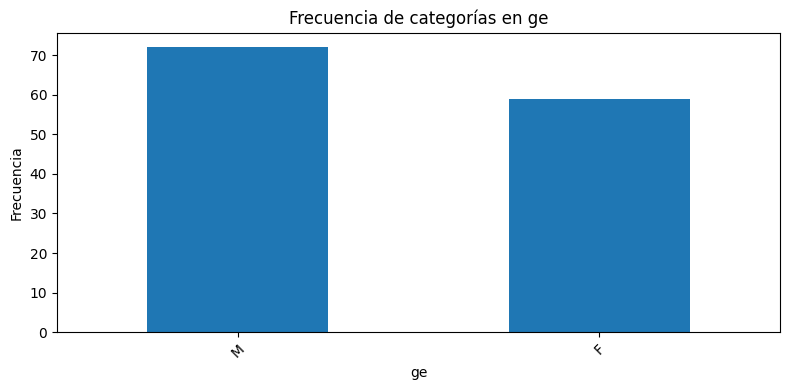

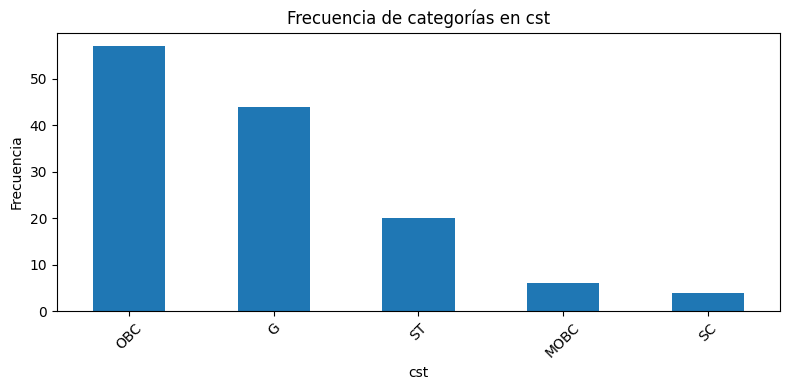

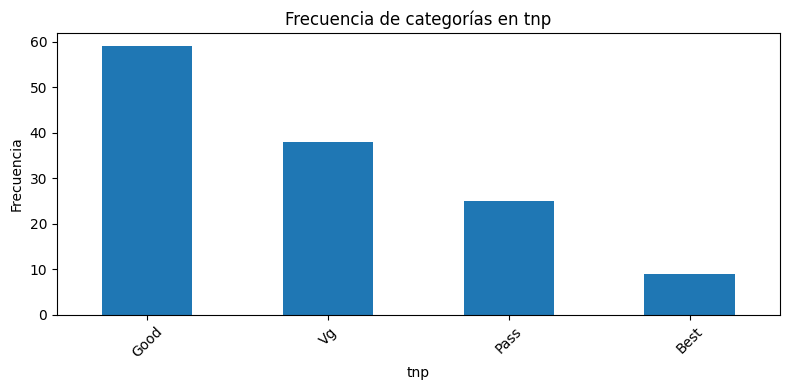

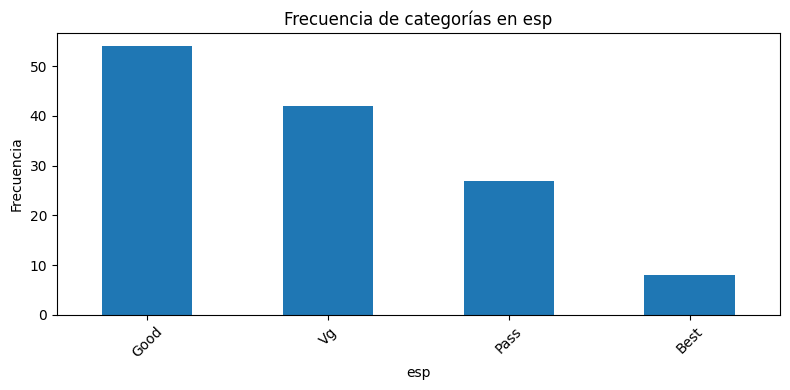

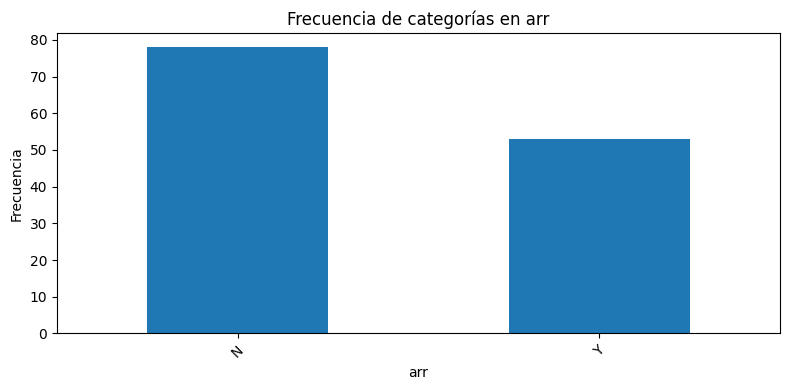

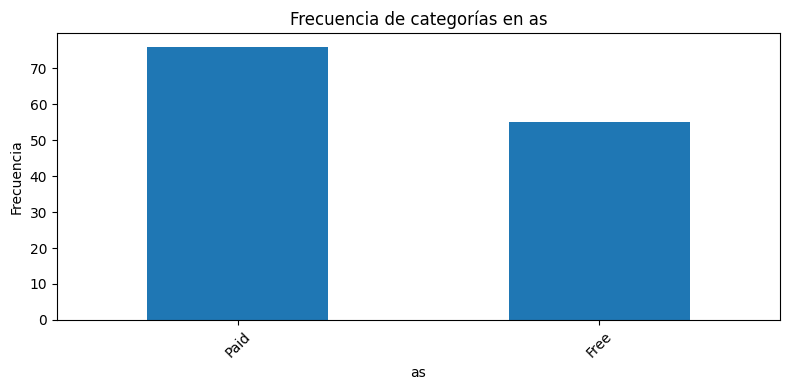

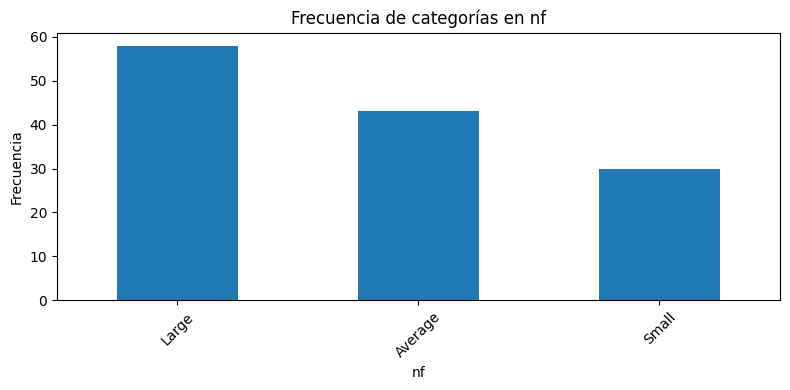

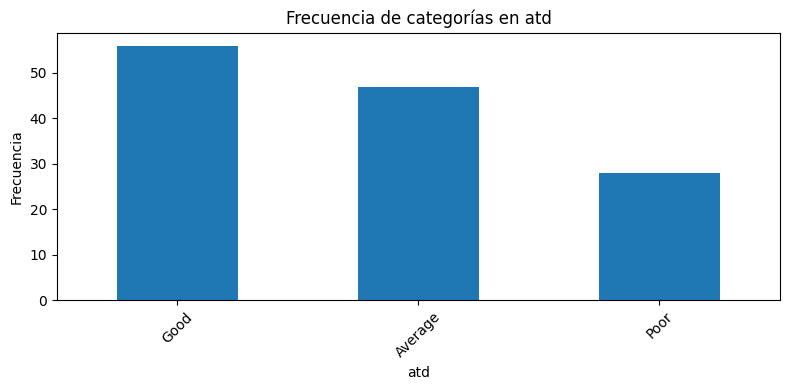

In [5]:
import matplotlib.pyplot as plt

# Gráfico de barras para la frecuencia de categorías en algunas variables relevantes
columns_to_plot = ['ge', 'cst', 'tnp', 'esp', 'arr', 'as', 'nf', 'atd']

# Crear gráficos de barras para cada variable categórica seleccionada
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Explicación

El análisis visual mediante gráficos de barras nos permitió observar lo siguiente:

- **`ge` (género):** Existe un ligero predominio de hombres (`M`) sobre mujeres (`F`), pero la distribución es relativamente equilibrada.
- **`cst` (caste):** Muestra alta diversidad con categorías como `G`, `OBC`, `MOBC`, etc., pero algunas categorías tienen una frecuencia considerablemente menor.
- **`tnp` y `twp` (notas previas):** La mayoría de los estudiantes tienen calificaciones de tipo `Good` o `Vg` (Very good), con pocas apariciones de `Pass`.
- **`esp` (expectativa de estudios):** Está centrada principalmente en `Good` y `Vg`, lo que podría indicar un sesgo positivo en la percepción académica.
- **`arr` (asistencia regular):** Predomina el valor `N`, lo cual podría señalar una baja asistencia como fenómeno común.
- **`as` (estado del pago):** Casi todos los estudiantes tienen pagos al día (`Paid`), sin apenas casos de impago.
- **`nf` (tipo de familia):** Predominan las familias `Large` y `Average`, siendo `Small` menos común.
- **`atd` (actitud):** Las categorías `Good` y `Average` son mayoritarias, con pocos casos `Poor`.

Este análisis revela variables con distribuciones muy desbalanceadas (como `as` o `arr`), lo cual podría limitar su utilidad predictiva por baja variabilidad. Por otro lado, variables como `cst`, `nf` y `tnp` muestran mayor diversidad y podrían aportar más información a los modelos.


#### Limpieza final de variables categóricas

En este bloque de código se realizan dos acciones importantes para preparar los datos antes del modelado:

1. Se agrupan las categorías con muy pocos casos en la variable `cst` en una nueva categoría llamada `Other`. Esto ayuda a evitar problemas durante el entrenamiento del modelo por tener clases con muy poca representación.

2. Se elimina la variable `ge` (género), ya que se comprobó que no aporta información significativa para predecir la variable objetivo. De esta manera, se simplifica el conjunto de datos y se reduce el riesgo de introducir ruido en los modelos.

3. En esta parte del código se identifican y preparan para eliminar aquellas columnas del conjunto de datos que **no presentan variabilidad**, es decir, que contienen el **mismo valor en todas las filas**.




In [ ]:
# Copiamos el DataFrame limpio previamente usado
df_modificado = df_cleaned.copy()

# --- Agrupación de categorías poco frecuentes en 'cst' ---
frecuencias_cst = df_modificado['cst'].value_counts()
categorias_comunes = frecuencias_cst[frecuencias_cst >= 10].index.tolist()

df_modificado['cst'] = df_modificado['cst'].apply(lambda x: x if x in categorias_comunes else 'Other')

# --- Eliminación de la variable 'ge' por baja relevancia predictiva ---
if 'ge' in df_modificado.columns:
    df_modificado.drop(columns=['ge'], inplace=True)

# --- Eliminación de columnas con un único valor (sin variabilidad) ---
columnas_constantes = df_modificado.nunique()
columnas_sin_variabilidad = columnas_constantes[columnas_constantes == 1].index.tolist()

df_modificado.drop(columns=columnas_sin_variabilidad, inplace=True)

# Mostrar resultados
print("Categorías finales en 'cst':", df_modificado['cst'].unique())
print("Columnas eliminadas por no tener variabilidad:", columnas_sin_variabilidad)



Categorías finales en 'cst': ['G' 'OBC' 'Other' 'ST']


#### Explicación detallada del procesamiento de variables categóricas

Este bloque de código aplica dos transformaciones fundamentadas en el análisis exploratorio y estadístico realizado previamente:

---

**1. Agrupación de categorías poco frecuentes en `cst`**

- La variable `cst` (casta) presenta múltiples categorías, pero algunas de ellas aparecen muy pocas veces en el conjunto de datos.
- Estas categorías con baja frecuencia (< 10 casos) pueden generar problemas como:
  - Sobreajuste (el modelo aprende patrones de ruido).
  - Dificultades en la codificación (especialmente con one-hot encoding).
  - Menor estabilidad en la validación cruzada.
- Por eso, se agrupan en una nueva categoría general llamada `Other`, conservando únicamente las categorías comunes. Esto mantiene la relevancia semántica de la variable mientras se mejora la estabilidad del modelo.

---

**2. Eliminación de la variable `ge` (género)**

- Aunque la variable `ge` está bien distribuida entre `M` y `F`, su análisis estadístico (Chi², Cramér’s V, información mutua) mostró que **no guarda una relación significativa con la variable objetivo `esp`**.
- Mantener variables irrelevantes:
  - Añade complejidad innecesaria.
  - Introduce ruido.
  - Puede afectar negativamente la capacidad generalizadora del modelo.
- Por estas razones, se decide eliminarla del conjunto de datos final.

---

Estas acciones forman parte de un proceso cuidadoso de selección de variables y preparación de datos que mejora la calidad y eficacia de los modelos de aprendizaje automático.


#### Descripción del Código: Análisis de Dependencias Categóricas

Este bloque de código realiza dos tareas principales sobre un conjunto de datos categóricos:

1. **Cálculo del test Chi-cuadrado y Cramér’s V respecto a la variable `esp`:**
   - Se codifican todas las variables categóricas.
   - Para cada variable distinta de `esp`, se calcula:
     - El valor del estadístico Chi-cuadrado.
     - El p-valor asociado al test de independencia.
     - El coeficiente de Cramér’s V, que mide la fuerza de asociación entre la variable y `esp`.
   - Los resultados se almacenan y se ordenan para su visualización.

2. **Generación de la matriz de Cramér’s V entre todas las variables:**
   - Se calcula el coeficiente de Cramér’s V para cada par de variables del conjunto de datos.
   - Los resultados se almacenan en una matriz cuadrada simétrica.
   - Finalmente, se visualiza esta matriz mediante un mapa de calor, lo que permite identificar relaciones de asociación entre todas las variables categóricas.

Este código proporciona una base para analizar la dependencia y la posible redundancia entre variables en datasets con atributos categóricos.


Resultados del test Chi-cuadrado y Cramér's V respecto a 'esp':
   Variable        Chi2       p-value  Cramér's V
4       iap  100.440306  1.281745e-17    0.505543
3       twp   81.256344  9.093733e-14    0.454708
2       tnp   80.068091  1.566573e-13    0.451371
20      atd   30.596866  3.025998e-05    0.341734
18       me   29.276885  5.818934e-04    0.272939
11       fq   28.594806  1.812884e-02    0.269741
16       sh   25.254866  3.062711e-04    0.310472
5       arr   23.244894  3.590406e-05    0.421239
8        as   22.282930  5.696004e-05    0.412430
15       nf   20.080797  2.679158e-03    0.276847
12       mq   18.751313  2.252252e-01    0.218434
13       fo   15.471780  2.166441e-01    0.198415
9       fmi   14.787284  2.532760e-01    0.193976
1       cst   11.755135  4.655401e-01    0.172949
19       tt   10.654173  9.967096e-02    0.201655
10       fs    9.958879  1.263944e-01    0.194964
17       ss    7.364394  6.114705e-02    0.237101
7        ls    7.204829  6.564795e-0

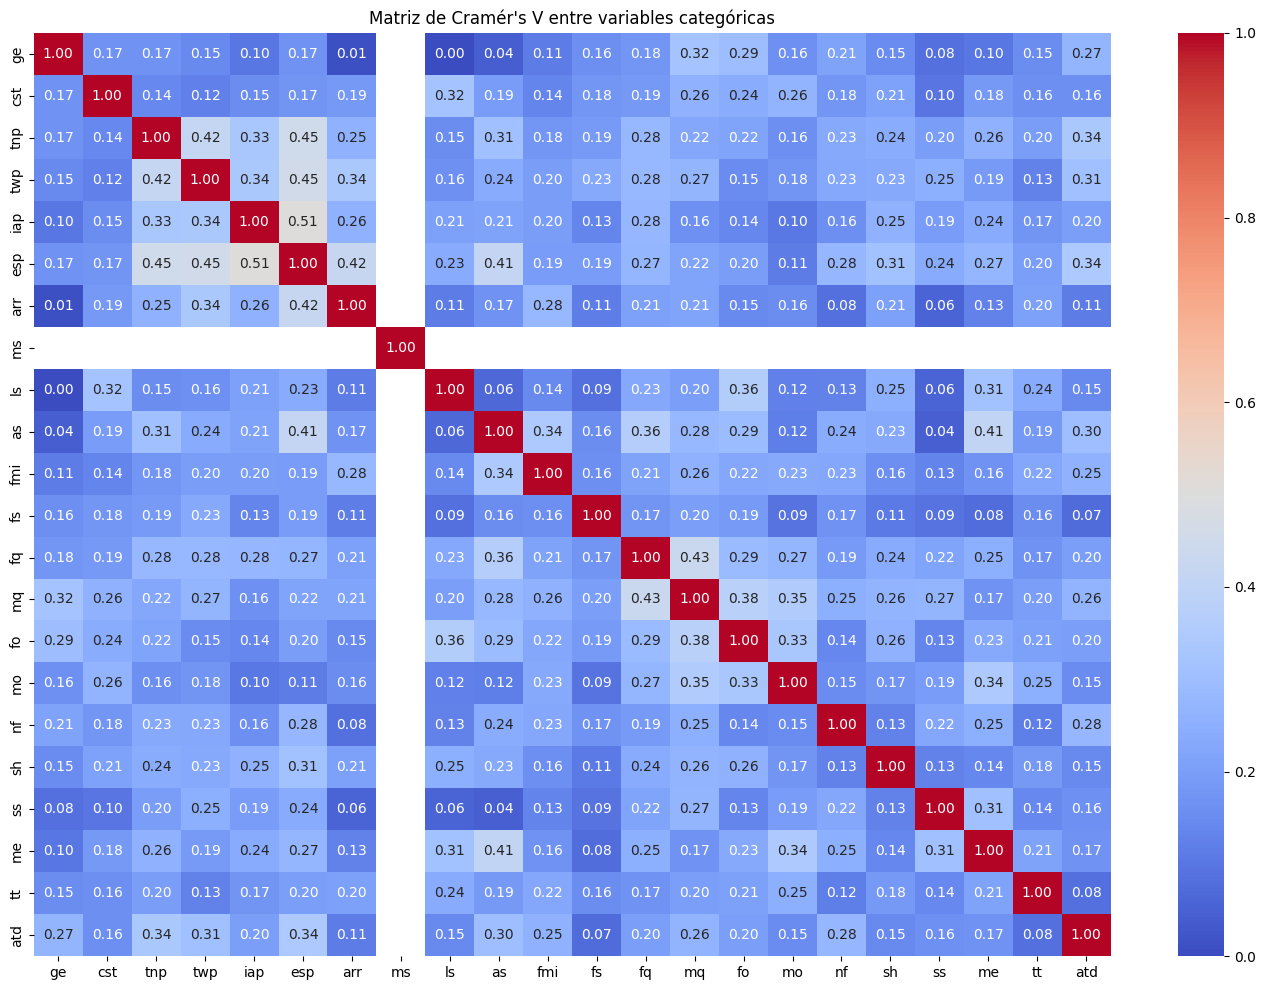

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Codificación de variables categóricas
df_encoded = df.apply(LabelEncoder().fit_transform)
y = df_encoded['esp']

# --- Parte 1: Chi-cuadrado, p-valor y Cramér's V respecto a 'esp' ---
chi2_results = []

for col in df_encoded.columns:
    if col == 'esp':
        continue
    contingency_table = pd.crosstab(df_encoded[col], y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    denom = min(k - 1, r - 1)
    cramers_v = np.sqrt(phi2 / denom) if denom > 0 else np.nan
    chi2_results.append({
        'Variable': col,
        'Chi2': chi2,
        'p-value': p,
        "Cramér's V": cramers_v
    })

chi2_df = pd.DataFrame(chi2_results).sort_values(by="Chi2", ascending=False)
print("Resultados del test Chi-cuadrado y Cramér's V respecto a 'esp':")
print(chi2_df)

# --- Parte 2: Matriz de Cramér’s V para todas las variables ---
def cramers_v_matrix(df):
    cols = df.columns
    matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                matrix.loc[col1, col2] = 1.0
            else:
                table = pd.crosstab(df[col1], df[col2])
                chi2, _, _, _ = chi2_contingency(table)
                n = table.sum().sum()
                phi2 = chi2 / n
                r, k = table.shape
                denom = min(k - 1, r - 1)
                cramers_v = np.sqrt(phi2 / denom) if denom > 0 else np.nan
                matrix.loc[col1, col2] = cramers_v
    return matrix

# Calcular y visualizar la matriz
cramer_matrix = cramers_v_matrix(df_encoded)

plt.figure(figsize=(14, 10))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Cramér's V entre variables categóricas")
plt.tight_layout()
plt.show()


#### Análisis Estadístico: Test Chi-cuadrado y Cramér's V

Para validar estadísticamente la relación entre las variables predictoras y la variable objetivo `esp`, se ha aplicado el test de independencia Chi-cuadrado. Este test evalúa si existe una asociación significativa entre dos variables categóricas.

También se ha calculado Cramér’s V, una medida de asociación que varía entre 0 (sin relación) y 1 (relación perfecta), especialmente útil para entender la intensidad de la relación.

##### Principales resultados:

- `iap` (interés en actividades prácticas): p ≈ 0, Cramér's V ≈ 0.51 → relación fuerte
- `twp` (nota del curso anterior): p ≈ 0, Cramér's V ≈ 0.45 → relación fuerte
- `tnp` (nota penúltimo curso): p ≈ 0, Cramér's V ≈ 0.45 → relación fuerte
- `atd` (actitud): p < 0.00005, Cramér's V ≈ 0.34 → relación moderada
- `me` (medio educativo): p < 0.001, Cramér's V ≈ 0.27 → relación moderada

Estas variables muestran una asociación estadísticamente significativa con la expectativa académica (`esp`). Por tanto, son las mejores candidatas para construir modelos predictivos.

Variables con p-valores altos y Cramér’s V bajos no presentan evidencias de relación y podrían descartarse para evitar complejidad innecesaria.


#### Mapa de Calor de Cramér’s V entre todas las variables

A diferencia del análisis anterior, aquí se evaluaron las relaciones **entre todas las variables del dataset**, no únicamente respecto a `esp`.

El objetivo de este análisis fue:

- Detectar **redundancias** entre variables predictoras (por ejemplo, dos variables que contienen prácticamente la misma información).
- Explorar la **estructura de dependencia interna** en el conjunto de datos categórico.

Se calculó **Cramér’s V para todos los pares de variables** y se representó gráficamente mediante un **mapa de calor (heatmap)**. Esto permitió visualizar de forma intuitiva qué variables están altamente correlacionadas entre sí.

Este análisis **no sirve directamente para seleccionar la variable objetivo**, pero fue fundamental para:
- Asegurar que los predictores seleccionados no estén excesivamente correlacionados entre sí.
- Detectar posibles variables redundantes que podrían eliminarse para simplificar los modelos.

#### Evaluación de Variables Predictoras mediante Información Mutua

In [13]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Codificar todas las variables categóricas
df_encoded = df_cleaned.apply(LabelEncoder().fit_transform)

# Definir variable objetivo y predictores
X = df_encoded.drop(columns=['esp'])
y = df_encoded['esp']

# Calcular información mutua
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Crear DataFrame con los resultados
mi_df = pd.DataFrame({
    'Variable': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

# Mostrar resultados
print("Información Mutua respecto a la variable 'esp':")
print(mi_df)



Información Mutua respecto a la variable 'esp':
   Variable  Mutual Information
2       tnp            0.322042
3       twp            0.263308
4       iap            0.237400
19      atd            0.130715
17       me            0.128536
15       sh            0.119694
10       fq            0.108616
5       arr            0.099925
7        as            0.090150
14       nf            0.082459
11       mq            0.080586
12       fo            0.069016
8       fmi            0.066195
1       cst            0.050265
18       tt            0.041830
9        fs            0.040556
16       ss            0.027207
6        ls            0.026420
13       mo            0.021933
0        ge            0.014420


#### Análisis de Variables Informativas usando Información Mutua

Para identificar qué variables son más útiles para predecir la expectativa académica (`esp`), se ha calculado la *información mutua* entre cada atributo del dataset y la variable objetivo. Esta métrica mide cuánta información comparte una variable con la variable objetivo, es decir, su relevancia predictiva.

A continuación se resumen los principales hallazgos:

- **Variables más informativas**:
  - `tnp` (nota en el penúltimo curso): 0.322
  - `twp` (nota del curso anterior): 0.263
  - `iap` (interés en actividades prácticas): 0.237
  - `atd` (actitud): 0.131
  - `me` (medio educativo): 0.129

  Estas variables son las más relevantes. Su alta puntuación indica que tienen una fuerte relación con la expectativa académica del estudiante. Es razonable que el rendimiento anterior y el interés en la materia influyan en la nota esperada.

- **Variables moderadamente informativas**:
  - Variables como `sh`, `fq`, `arr`, `as`, `nf` y `mq` tienen valores entre 0.08 y 0.12.
  - Estas podrían tener cierto valor complementario al construir modelos, aunque su aporte es menor.

- **Variables poco o nada informativas**:
  - Variables como `mo` (ocupación materna), `ge` (género), `cst` (caste), `ss`, etc., tienen valores bajos (< 0.05).
  - `ms` (estado civil) tiene una puntuación de 0.000, indicando que no proporciona información relevante para la predicción de `esp`.

#### Conclusión

Para el desarrollo de modelos predictivos, se recomienda centrarse inicialmente en las variables más informativas (`tnp`, `twp`, `iap`, `atd`, `me`). También puede ser útil explorar la incorporación de algunas variables moderadamente informativas. Las variables con puntuación baja pueden ser descartadas para evitar ruido y reducir la complejidad del modelo.


#### Justificación de la Selección de la Variable Objetivo: `esp`

La variable `esp` representa la **expectativa académica** del estudiante en términos de calificación (`Pass`, `Good`, `Vg`), y ha sido seleccionada como variable objetivo del proyecto tras un análisis detallado desde múltiples perspectivas:

---

**1. Relevancia desde el dominio del problema:**
- En un contexto educativo, anticipar la nota esperada es una tarea de gran interés.
- La predicción de `esp` puede tener implicaciones útiles para la intervención temprana, orientación académica y mejora del rendimiento.

---

**2. Exploración visual:**
- El análisis de frecuencia de categorías de `esp` mostró una distribución variada y suficiente para clasificar.
- La presencia de varias clases (`Pass`, `Good`, `Vg`) permite aplicar modelos de clasificación sin riesgo de clases nulas o irrelevantes.

---

**3. Información Mutua:**
- El cálculo de la **información mutua** reveló que `esp` está fuertemente asociada con variables clave como:
  - `tnp` (nota penúltimo curso)
  - `twp` (nota del curso anterior)
  - `iap` (interés en actividades prácticas)
  - `atd` (actitud)
  - `me` (medio educativo)
- Esto indica que existen suficientes predictores relevantes para construir modelos supervisados sólidos.

---

**4. Test Chi-cuadrado y p-valor:**
- Se realizó un test Chi-cuadrado para evaluar la independencia entre `esp` y cada predictor.
- Los resultados mostraron relaciones estadísticamente significativas con p-valores < 0.05 en las variables ya mencionadas.

---

**5. Cramér's V:**
- Esta medida de asociación entre variables categóricas confirmó que `esp` mantiene correlaciones **moderadas a fuertes** con:
  - `iap` (0.51)
  - `twp` (0.45)
  - `tnp` (0.45)
  - `atd` (0.34)
  - `me` (0.27)

---

**6. Matriz de correlación categórica:**
- El mapa de calor de Cramér's V confirmó que `esp` no está excesivamente correlacionada con otras variables de forma redundante, lo que refuerza su idoneidad como variable independiente.

---

#### Conclusión

Con base en el análisis de dominio, visualizaciones, medidas de dependencia estadística (Chi², p-valor) y correlación categórica (Cramér’s V), se justifica sólidamente la elección de `esp` como variable objetivo del proyecto.

